In [1]:
import pandas as pd
import os 
import numpy as np
import cv2
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import random as rn
from sklearn.preprocessing import  StandardScaler


In [2]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten , Input ,BatchNormalization, Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Conv1D , MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,balanced_accuracy_score
import joblib

In [3]:
SUB = pd.read_csv('Sensor + Image/sensor.csv', skiprows = 1)
SUB.head()

,Time,X-axis Accelerometer (g),Y-axis Accelerometer (g),Z-axis Accelerometer (g),Roll Gyroscrope (deg/s),Pitch Gyroscope (deg/s),Yaw Gyroscope (deg/s),Luminosity (lux),X-axis Accelerometer (g).1,Y-axis Accelerometer (g).1,...,Yaw Gyroscope (deg/s).4,Luminosity (lux).4,Raw Brainwave Signal,Infrared 1,Infrared 2,Infrared 3,Infrared 4,Infrared 5,Infrared 6,Label
0,2018-07-04T12:04:17.738369,-1.005,0.229,-0.083,-0.671,0.488,-2.683,0.0,-0.981,0.260,...,315.915,2108.154,45.0,1,1,1,1,1,1,7
1,2018-07-04T12:04:17.790509,-1.005,0.228,-0.082,-3.415,-0.549,0.122,0.0,-0.981,0.260,...,344.146,2108.154,1.0,1,1,1,1,1,1,7
2,2018-07-04T12:04:17.836632,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,0.0,-0.975,0.282,...,372.012,2108.154,325.0,1,1,1,1,1,1,7
3,2018-07-04T12:04:17.885262,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,0.0,-0.973,0.301,...,356.463,2108.154,396.0,1,1,1,1,1,1,7
4,2018-07-04T12:04:17.945423,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,0.0,-0.973,0.301,...,126.768,2108.154,-436.0,1,1,1,1,1,1,7


In [4]:
print(SUB.shape)

(294678, 44)


# Data Processing

In [5]:
SUB.isnull().sum()

Time                              0
X-axis Accelerometer (g)          0
Y-axis Accelerometer (g)          0
Z-axis Accelerometer (g)          0
Roll Gyroscrope (deg/s)           0
Pitch Gyroscope (deg/s)           0
Yaw Gyroscope (deg/s)             0
Luminosity (lux)                  0
X-axis Accelerometer (g).1    36109
Y-axis Accelerometer (g).1    36109
Z-axis Accelerometer (g).1    36109
Roll Gyroscrope (deg/s).1     36109
Pitch Gyroscope (deg/s).1     36109
Yaw Gyroscope (deg/s).1       36109
Luminosity (lux).1            36109
X-axis Accelerometer (g).2        0
Y-axis Accelerometer (g).2        0
Z-axis Accelerometer (g).2        0
Roll Gyroscrope (deg/s).2         0
Pitch Gyroscope (deg/s).2         0
Yaw Gyroscope (deg/s).2           0
Luminosity (lux).2                0
X-axis Accelerometer (g).3        0
Y-axis Accelerometer (g).3        0
Z-axis Accelerometer (g).3        0
Roll Gyroscrope (deg/s).3         0
Pitch Gyroscope (deg/s).3         0
Yaw Gyroscope (deg/s).3     

In [6]:
NA_cols  = SUB.columns[SUB.isnull().any()]
print('Columns contain NULL values : \n', NA_cols )


SUB.dropna(inplace = True)
SUB.drop_duplicates(inplace = True)
print('Sensor Data shape after dropping NaN and redudant samples :',SUB.shape)


times = SUB['Time']

list_DROP = [ 'Infrared 1', 
              'Infrared 2', 
              'Infrared 3', 
              'Infrared 4', 
              'Infrared 5', 
              'Infrared 6']
SUB.drop(list_DROP, axis = 1, inplace=  True )
SUB.drop( NA_cols, axis = 1, inplace=  True ) # drop NAN COLS

print('Sensor Data shape after dropping columns contain NaN values :',SUB.shape)

Columns contain NULL values : 
 Index(['X-axis Accelerometer (g).1', 'Y-axis Accelerometer (g).1',
       'Z-axis Accelerometer (g).1', 'Roll Gyroscrope (deg/s).1',
       'Pitch Gyroscope (deg/s).1', 'Yaw Gyroscope (deg/s).1',
       'Luminosity (lux).1', 'Raw Brainwave Signal '],
      dtype='object')
Sensor Data shape after dropping NaN and redudant samples : (258114, 44)
Sensor Data shape after dropping columns contain NaN values : (258114, 30)


In [7]:
SUB.set_index('Time', inplace = True)
SUB.head()

,X-axis Accelerometer (g),Y-axis Accelerometer (g),Z-axis Accelerometer (g),Roll Gyroscrope (deg/s),Pitch Gyroscope (deg/s),Yaw Gyroscope (deg/s),Luminosity (lux),X-axis Accelerometer (g).2,Y-axis Accelerometer (g).2,Z-axis Accelerometer (g).2,...,Yaw Gyroscope (deg/s).3,Luminosity (lux).3,X-axis Accelerometer (g).4,Y-axis Accelerometer (g).4,Z-axis Accelerometer (g).4,Roll Gyroscrope (deg/s).4,Pitch Gyroscope (deg/s).4,Yaw Gyroscope (deg/s).4,Luminosity (lux).4,Label
Time,,,,,,,,,,,,,,,,,,,,,
2018-07-04T12:04:17.738369,-1.005,0.229,-0.083,-0.671,0.488,-2.683,0.0,0.146,0.895,0.367,...,9.207,1231.336,-1.240,-0.557,0.227,-75.854,44.024,315.915,2108.154,7
2018-07-04T12:04:17.790509,-1.005,0.228,-0.082,-3.415,-0.549,0.122,0.0,0.146,0.895,0.367,...,5.122,1231.336,-1.240,-0.557,0.227,-28.780,55.549,344.146,2108.154,7
2018-07-04T12:04:17.836632,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,0.0,0.178,0.896,0.373,...,4.329,1231.336,-1.884,-0.687,0.251,27.256,87.134,372.012,2108.154,7
2018-07-04T12:04:17.885262,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,0.0,0.160,0.895,0.372,...,0.366,1231.336,-1.884,-0.687,0.251,2.866,117.683,356.463,2108.154,7
2018-07-04T12:04:17.945423,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,0.0,0.160,0.895,0.372,...,-3.232,1231.336,-1.597,-0.646,0.112,10.000,30.671,126.768,2108.154,7


In [8]:
cam = '1'

image = 'Sensor + Image' + '/' + 'image_' + cam +  '.npy'       
name = 'Sensor + Image' + '/' + 'name_' + cam +  '.npy'
label = 'Sensor + Image' + '/' + 'label_' + cam +  '.npy'

img_1 = np.load(image)
label_1 = np.load(label)
name_1 = np.load(name)

cam = '2'

image = 'Sensor + Image' + '/' + 'image_' + cam +  '.npy'       
name = 'Sensor + Image' + '/' + 'name_' + cam +  '.npy'
label = 'Sensor + Image' + '/' + 'label_' + cam +  '.npy'

img_2 = np.load(image)
label_2 = np.load(label)
name_2 = np.load(name)



In [9]:
print(len(img_1))
print(len(name_1))
print(len(img_2))
print(len(name_2))

294677
294677
294677
294677


In [10]:
# remove NaN values corresponding to index sample in csv file
redundant_1 = list(set(name_1) - set(times))
redundant_2 = list(set(name_2) - set(times))
ind = np.arange(0,294677)


red_in1 = ind[np.isin(name_1,redundant_1)]
name_1 =  np.delete(name_1, red_in1)
img_1 = np.delete(img_1, red_in1, axis = 0 )
label_1 = np.delete(label_1, red_in1)

red_in2 = ind[np.isin(name_2,redundant_2)]
name_2 =  np.delete(name_2, red_in2)
img_2 = np.delete(img_2, red_in2, axis = 0 )
label_2 = np.delete(label_2, red_in2)

In [13]:
print(len(name_2))
print(len(name_1))

258113
258113


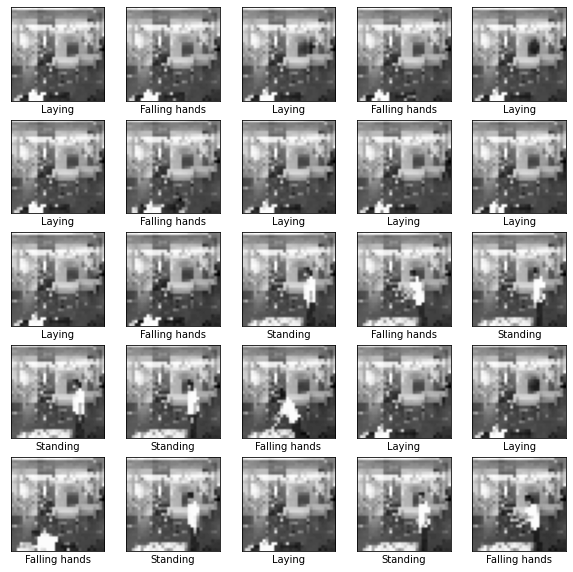

In [14]:
class_name = [    '?????' ,
                'Falling hands' ,
                 'Falling knees' ,
                 'Falling backwards',
                 'Falling sideward' ,
                ' Falling chair',
                ' Walking',
                 'Standing' ,
                 'Sitting' ,
                 'Picking object' ,
                 'Jumping' ,
                 'Laying' ]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_1[i], cmap = 'gray')
    plt.xlabel(class_name[label_1[i]])
plt.show()

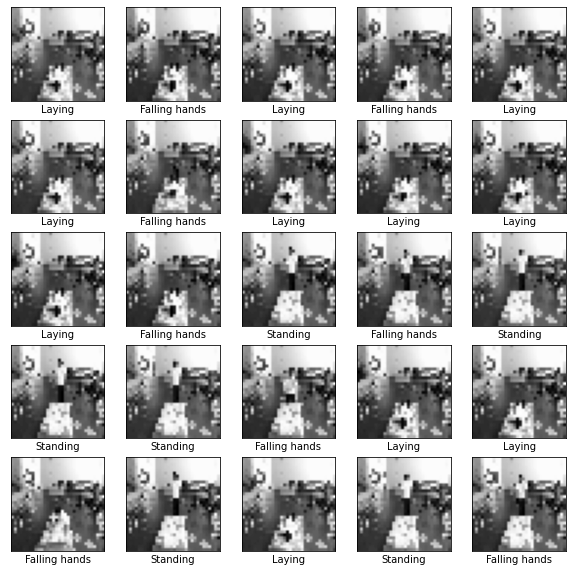

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_2[i], cmap = 'gray')
    plt.xlabel(class_name[label_2[i]])
plt.show()

In [16]:

data = SUB.loc[name_1].values
print(img_1.shape)
print(img_2.shape)
print(data.shape)


print((label_2 == data[:,-1]).all())
print((label_1 == data[:,-1]).all())

(258113, 32, 32)
(258113, 32, 32)
(258113, 29)
True
True


In [17]:

def set_seed(): 
    SEED = 0 
    os.environ['PYTHONHASHSEED']=str(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    rn.seed(SEED)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

set_seed()
X_csv, y_csv = data[:,:-1] , data[:,-1]

y_csv = np.where(y_csv == 20 , 0, y_csv)
label_1 = np.where(label_1 == 20 , 0, label_1)
label_2 = np.where(label_2 == 20, 0, label_2)
X_train_csv,X_rem_csv,y_train_csv,y_rem_csv = train_test_split(X_csv, y_csv, 
                                                                 train_size = 0.6,
                                                                 random_state = 42)

X_val_csv, X_test_csv, y_val_csv, y_test_csv = train_test_split(X_rem_csv, y_rem_csv, 
                                                                  test_size = 0.5, 
                                                                  random_state = 42)

print('X_train_csv shape : ',X_train_csv.shape)
print('X_test_csv shape : ',X_test_csv.shape)
print('X_val_csv shape : ',X_val_csv.shape)
print('y_train_csv shape : ',y_train_csv.shape)
print('y_test_csv shape : ',y_test_csv.shape)
print('y_val_csv shape : ',y_val_csv.shape)

Y_train_csv = to_categorical(y_train_csv, 12)
Y_test_csv = to_categorical(y_test_csv, 12)
Y_val_csv = to_categorical(y_val_csv, 12)

print('Y_train_csv shape : ',Y_train_csv.shape)
print('Y_test_csv shape : ',Y_test_csv.shape)
print('Y_val_csv shape : ',Y_val_csv.shape)



X_train_1,X_rem_1,y_train_1,y_rem_1 = train_test_split(img_1,label_1,
                                                         train_size = 0.6,
                                                         random_state = 42,
                                                         )

X_val_1,X_test_1,y_val_1,y_test_1 = train_test_split(X_rem_1,y_rem_1,
                                                         test_size = 0.5,
                                                         random_state = 42,
                                                         )
print('*'*20)
print('X_train_1 shape : ',X_train_1.shape)
print('X_test_1 shape : ',X_test_1.shape)
print('X_val_1 shape : ',X_val_1.shape)
print('y_train_1 shape : ',y_train_1.shape)
print('y_test_1 shape : ',y_test_1.shape)
print('y_val_1 shape : ',y_val_1.shape)


Y_train_1 = to_categorical(y_train_1, 12)
Y_test_1 = to_categorical(y_test_1, 12)
Y_val_1 = to_categorical(y_val_1, 12)

print('Y_train_1 shape : ',Y_train_1.shape)
print('Y_test_1 shape : ',Y_test_1.shape)
print('Y_val_1 shape : ',Y_val_1.shape)



X_train_2,X_rem_2,y_train_2,y_rem_2 = train_test_split(img_2,label_2,
                                                         train_size = 0.6,
                                                         random_state = 42,
                                                         )

X_val_2,X_test_2,y_val_2,y_test_2 = train_test_split(X_rem_2,y_rem_2,
                                                         test_size = 0.5,
                                                         random_state = 42,
                                                         )

print('*'*20)
print('X_train_2 shape : ',X_train_2.shape)
print('X_test_2 shape : ',X_test_2.shape)
print('X_val_2 shape : ',X_val_2.shape)
print('y_train_2 shape : ',y_train_2.shape)
print('y_test_2 shape : ',y_test_2.shape)
print('y_val_2 shape : ',y_val_2.shape)


Y_train_2 = to_categorical(y_train_2, 12)
Y_test_2 = to_categorical(y_test_2, 12)
Y_val_2 = to_categorical(y_val_2, 12)

print('Y_train_2 shape : ',Y_train_2.shape)
print('Y_test_2 shape : ',Y_test_2.shape)
print('Y_val_2 shape : ',Y_val_2.shape)


X_train_csv shape :  (154867, 28)
X_test_csv shape :  (51623, 28)
X_val_csv shape :  (51623, 28)
y_train_csv shape :  (154867,)
y_test_csv shape :  (51623,)
y_val_csv shape :  (51623,)
Y_train_csv shape :  (154867, 12)
Y_test_csv shape :  (51623, 12)
Y_val_csv shape :  (51623, 12)
********************
X_train_1 shape :  (154867, 32, 32)
X_test_1 shape :  (51623, 32, 32)
X_val_1 shape :  (51623, 32, 32)
y_train_1 shape :  (154867,)
y_test_1 shape :  (51623,)
y_val_1 shape :  (51623,)
Y_train_1 shape :  (154867, 12)
Y_test_1 shape :  (51623, 12)
Y_val_1 shape :  (51623, 12)
********************
X_train_2 shape :  (154867, 32, 32)
X_test_2 shape :  (51623, 32, 32)
X_val_2 shape :  (51623, 32, 32)
y_train_2 shape :  (154867,)
y_test_2 shape :  (51623,)
y_val_2 shape :  (51623,)
Y_train_2 shape :  (154867, 12)
Y_test_2 shape :  (51623, 12)
Y_val_2 shape :  (51623, 12)


In [18]:
print((y_train_1 == y_train_csv).all())
print((y_train_2 == y_train_csv).all())

print((y_val_1 == y_val_csv).all())
print((y_val_2 == y_val_csv).all())

print((y_test_1 == y_test_csv).all())
print((y_test_2 == y_test_csv).all())

True
True
True
True
True
True


In [19]:
shape1, shape2 = 32,32
X_train_1 = X_train_1.reshape(X_train_1.shape[0], shape1, shape2 ,1)
X_train_2 = X_train_2.reshape(X_train_2.shape[0], shape1, shape2 ,1)
X_val_1 = X_val_1.reshape(X_val_1.shape[0], shape1, shape2 , 1)
X_val_2 = X_val_2.reshape(X_val_2.shape[0], shape1, shape2 , 1)
X_test_1 = X_test_1.reshape(X_test_1.shape[0], shape1, shape2 ,1)
X_test_2 = X_test_2.reshape(X_test_2.shape[0], shape1, shape2 ,1)

In [20]:
X_train_1_scaled = X_train_1/255.0
X_train_2_scaled = X_train_2/255.0

X_val_1_scaled = X_val_1/255.0
X_val_2_scaled = X_val_2/255.0

X_test_1_scaled = X_test_1/255.0
X_test_2_scaled = X_test_2/255.0

In [21]:
print(X_train_1_scaled.shape)
print(X_test_1_scaled.shape)
print(X_val_1_scaled.shape)

print(X_train_2_scaled.shape)
print(X_test_2_scaled.shape)
print(X_val_2_scaled.shape)

(154867, 32, 32, 1)
(51623, 32, 32, 1)
(51623, 32, 32, 1)
(154867, 32, 32, 1)
(51623, 32, 32, 1)
(51623, 32, 32, 1)


In [22]:

def display_result(y_test , y_pred) :
    print('Accuracy score : ', accuracy_score(y_test , y_pred) )
    print('Precision score : ', precision_score(y_test , y_pred, average='weighted'))
    print('Recall score : ', recall_score(y_test , y_pred, average='weighted'))
    print('F1 score : ', f1_score(y_test , y_pred, average='weighted'))
    

def scaled_data(X_train, X_test, X_val):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_val_scaled = scaler.transform(X_val)
    return X_train_scaled, X_test_scaled , X_val_scaled


def convert_to_categorical (y_train, y_test, y_val) :
    print('--------------------------To Categorical ---------------------------')
    Y_train = to_categorical(y_train, 12)
    Y_test = to_categorical(y_test, 12)
    Y_val = to_categorical(y_val,12)
    
    print('Before    : ', y_train[0])
    print('After     : ',Y_train[0])
    return Y_train, Y_test, Y_val 


X_train_csv_scaled, X_test_csv_scaled , X_val_csv_scaled = scaled_data(X_train_csv, X_test_csv, X_val_csv)
Y_train_csv , Y_test_csv , Y_val_csv = convert_to_categorical (y_train_csv, y_test_csv, y_val_csv)



--------------------------To Categorical ---------------------------
Before    :  6.0
After     :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Sensor Data

## Multilayer Perceptron

In [23]:

def csv_MLP(input_shapes):
    set_seed()
    model =  Sequential([
                    Dense(2000, activation = tf.nn.relu, input_shape = (input_shapes,)),
                    BatchNormalization(),
                    Dense(600, activation = tf.nn.relu),
                    BatchNormalization(),
                    Dropout(0.2),
                    Dense(12, activation='softmax'),
                ])
    model.compile(
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001 , name = 'Adam'),
                  loss='categorical_crossentropy' ,
                  metrics =[
                           keras.metrics.CategoricalAccuracy( name='categorical_accuracy'),
                           keras.metrics.Precision( name = 'precision' ),
                           keras.metrics.Recall( name = 'recall' ),
                           tfa.metrics.F1Score( num_classes=12,   name = 'f1_score', average='weighted'),
                          ] )
    return model
model_MLP = csv_MLP(X_train_csv_scaled.shape[1])
model_MLP.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2000)              58000     
_________________________________________________________________
batch_normalization (BatchNo (None, 2000)              8000      
_________________________________________________________________
dense_1 (Dense)              (None, 600)               1200600   
_________________________________________________________________
batch_normalization_1 (Batch (None, 600)               2400      
_________________________________________________________________
dropout (Dropout)            (None, 600)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                7212      
Total params: 1,276,212
Trainable params: 1,271,012
Non-trainable params: 5,200
__________________________________________

In [25]:

f1_callback_MLP = ModelCheckpoint("Saved Model/Experiments/MLP_csv.hdf5", 
                              monitor='val_f1_score', 
                              verbose=1, 
                              save_best_only=True,
                              mode='max')

history_MLP = model_MLP.fit(X_train_csv_scaled,Y_train_csv,
                                      epochs= 150,
                                      batch_size=  2**10,
                                      validation_data=(X_val_csv_scaled,Y_val_csv),
                                      callbacks = [f1_callback_MLP]
                                     )


Epoch 1/150
151/152 [============================>.] - ETA: 0s - loss: 0.2750 - categorical_accuracy: 0.9308 - precision: 0.9518 - recall: 0.9192 - f1_score: 0.9276

/home/tf/.conda/envs/tf2/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  'consistency.' % (self.__class__.__name__,))


152/152 [==============================] - 15s 86ms/step - loss: 0.2749 - categorical_accuracy: 0.9309 - precision: 0.9518 - recall: 0.9192 - f1_score: 0.9276 - val_loss: 1.2544 - val_categorical_accuracy: 0.7015 - val_precision: 0.9845 - val_recall: 0.1800 - val_f1_score: 0.6351

Epoch 00001: val_f1_score improved from -inf to 0.63509, saving model to Saved Model/Experiments/MLP_csv.hdf5
Epoch 2/150
152/152 [==============================] - 13s 83ms/step - loss: 0.1184 - categorical_accuracy: 0.9662 - precision: 0.9743 - recall: 0.9594 - f1_score: 0.9644 - val_loss: 0.3571 - val_categorical_accuracy: 0.9399 - val_precision: 0.9787 - val_recall: 0.8619 - val_f1_score: 0.9369

Epoch 00002: val_f1_score improved from 0.63509 to 0.93692, saving model to Saved Model/Experiments/MLP_csv.hdf5
Epoch 3/150
152/152 [==============================] - 13s 83ms/step - loss: 0.0855 - categorical_accuracy: 0.9741 - precision: 0.9798 - recall: 0.9693 - f1_score: 0.9732 - val_loss: 0.1050 - val_categ

In [27]:
print("best model: ")
model_MLP.load_weights("Saved Model/Experiments/MLP_csv.hdf5")
print('Validation Set')
print(model_MLP.evaluate(X_val_csv_scaled, Y_val_csv))
print('Test Set')
print(model_MLP.evaluate(X_test_csv_scaled, Y_test_csv))


best model: 
Validation Set
1614/1614 [==============================] - 3s 2ms/step - loss: 0.0606 - categorical_accuracy: 0.9907 - precision: 0.9909 - recall: 0.9905 - f1_score: 0.9905
[0.060551222413778305, 0.9906630516052246, 0.9908537864685059, 0.9905274510383606, 0.9904990792274475]
Test Set
1614/1614 [==============================] - 3s 2ms/step - loss: 0.0618 - categorical_accuracy: 0.9904 - precision: 0.9905 - recall: 0.9903 - f1_score: 0.9903
[0.06177337467670441, 0.9903724789619446, 0.9905056953430176, 0.9902563095092773, 0.9902580380439758]


dict_keys(['loss', 'categorical_accuracy', 'precision', 'recall', 'f1_score', 'val_loss', 'val_categorical_accuracy', 'val_precision', 'val_recall', 'val_f1_score'])


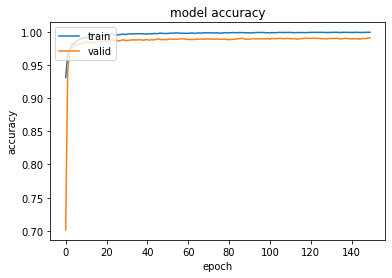

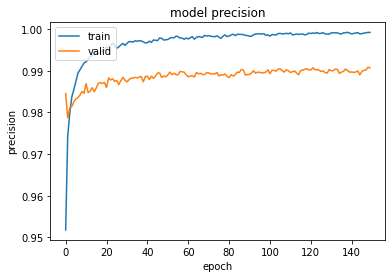

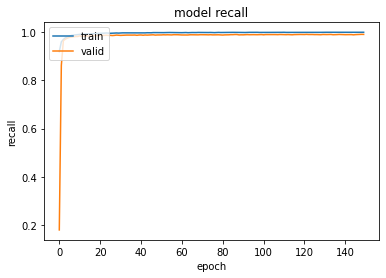

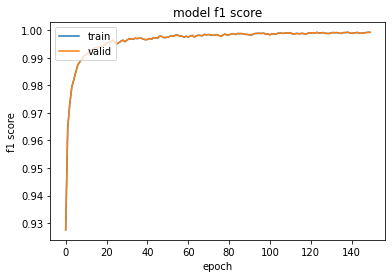

In [28]:
print(history_MLP.history.keys())
plt.plot(history_MLP.history['categorical_accuracy'])
plt.plot(history_MLP.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()



plt.plot(history_MLP.history['precision'])
plt.plot(history_MLP.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()



plt.plot(history_MLP.history['recall'])
plt.plot(history_MLP.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


plt.plot(history_MLP.history['f1_score'])
plt.plot(history_MLP.history['f1_score'])
plt.title('model f1 score')
plt.ylabel('f1 score')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## XGBBoost

In [39]:
import xgboost
from xgboost import XGBClassifier


def csv_XGB() :
#     set_seed()
    model_XGB = XGBClassifier(objective="multi:softprob", 
                              eta = 0.5, 
                              random_state=42,
                              use_label_encoder=False,
                              n_estimators  = 60
                           )
    return model_XGB

model_XGB =  csv_XGB()

model_XGB.fit(
              X = X_train_csv_scaled,
              y =  y_train_csv , 
              eval_set = [(X_train_csv_scaled,y_train_csv) ,(X_val_csv_scaled,y_val_csv)],
              verbose= 1,
              early_stopping_rounds=5,     
             )
 

[15:19:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:0.67665	validation_1-mlogloss:0.69356
[1]	validation_0-mlogloss:0.47278	validation_1-mlogloss:0.49282
[2]	validation_0-mlogloss:0.35109	validation_1-mlogloss:0.37422
[3]	validation_0-mlogloss:0.27121	validation_1-mlogloss:0.29593
[4]	validation_0-mlogloss:0.21483	validation_1-mlogloss:0.24047
[5]	validation_0-mlogloss:0.17486	validation_1-mlogloss:0.20128
[6]	validation_0-mlogloss:0.14380	validation_1-mlogloss:0.17106
[7]	validation_0-mlogloss:0.12029	validation_1-mlogloss:0.14905
[8]	validation_0-mlogloss:0.10043	validation_1-mlogloss:0.12968
[9]	validation_0-mlogloss:0.08752	validation_1-mlogloss:0.11685
[10]	validation_0-mlogloss:0.07582	validation_1-mlogloss:0.10518
[11]	validation_0-mlogloss:0.06494	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.5, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=60, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [45]:
print('---------------------Test Set--------------------------')
y_pred_csv_XGB = model_XGB.predict(X_test_csv_scaled)
display_result(y_test_csv, y_pred_csv_XGB)    

---------------------Test Set--------------------------
Accuracy score :  0.9921352885341805
Precision score :  0.9919991563290247
Recall score :  0.9921352885341805
F1 score :  0.9920019481790098


In [46]:
filename = 'Saved Model/Experiments/XGB_model.sav'
joblib.dump(model_XGB, filename)
loaded_XGB_model = joblib.load(filename)

y_pred_csv_XGB = loaded_XGB_model.predict(X_test_csv_scaled)
display_result(y_test_csv, y_pred_csv_XGB) 

Accuracy score :  0.9921352885341805
Precision score :  0.9919991563290247
Recall score :  0.9921352885341805
F1 score :  0.9920019481790098


## CATBOOST

In [32]:
from catboost import CatBoostClassifier
def csv_CatBoost():
    model  = CatBoostClassifier(
                                n_estimators=500, 
                                random_seed= 42,
                                learning_rate=0.25,
                                max_depth = 12,
                                )
    return model

model_catboost = csv_CatBoost()
    
model_catboost .fit(
    X_train_csv_scaled, 
    y_train_csv,
    eval_set=(X_val_csv_scaled, y_val_csv),
    verbose= 1 ,
    early_stopping_rounds= 5
)



0:	learn: 0.8702462	test: 0.8745435	best: 0.8745435 (0)	total: 1.89s	remaining: 15m 42s
1:	learn: 0.6868242	test: 0.6929683	best: 0.6929683 (1)	total: 3.7s	remaining: 15m 20s
2:	learn: 0.5648195	test: 0.5718845	best: 0.5718845 (2)	total: 5.5s	remaining: 15m 11s
3:	learn: 0.4799517	test: 0.4886897	best: 0.4886897 (3)	total: 7.29s	remaining: 15m 4s
4:	learn: 0.4138388	test: 0.4242951	best: 0.4242951 (4)	total: 9.14s	remaining: 15m 5s
5:	learn: 0.3637087	test: 0.3754206	best: 0.3754206 (5)	total: 10.9s	remaining: 14m 59s
6:	learn: 0.3225172	test: 0.3351432	best: 0.3351432 (6)	total: 12.7s	remaining: 14m 54s
7:	learn: 0.2857062	test: 0.2998267	best: 0.2998267 (7)	total: 14.6s	remaining: 14m 56s
8:	learn: 0.2587435	test: 0.2745320	best: 0.2745320 (8)	total: 16.4s	remaining: 14m 55s
9:	learn: 0.2397674	test: 0.2564500	best: 0.2564500 (9)	total: 18.2s	remaining: 14m 49s
10:	learn: 0.2255793	test: 0.2429851	best: 0.2429851 (10)	total: 19.9s	remaining: 14m 45s
11:	learn: 0.2071352	test: 0.22559

In [47]:
print('---------------------Test Set--------------------------')
y_pred_csv_catboost = model_catboost.predict(X_test_csv_scaled)
display_result(y_test_csv, y_pred_csv_catboost)    


---------------------Test Set--------------------------
Accuracy score :  0.990546849272611
Precision score :  0.9902649653012341
Recall score :  0.990546849272611
F1 score :  0.9902817762782822


In [48]:
filename = 'Saved Model/Experiments/Catboost_model.sav'
joblib.dump(model_catboost, filename)
loaded_catboost_model = joblib.load(filename)

y_pred_csv_catboost = loaded_catboost_model.predict(X_test_csv_scaled)
display_result(y_test_csv, y_pred_csv_catboost) 

Accuracy score :  0.990546849272611
Precision score :  0.9902649653012341
Recall score :  0.990546849272611
F1 score :  0.9902817762782822


# IMAGE 1 

In [35]:
print('X_train_1 shape : ',X_train_1.shape)
print('X_test_1 shape : ',X_test_1.shape)
print('X_val_1 shape : ',X_val_1.shape)
print('y_train_1 shape : ',y_train_1.shape)
print('y_test_1 shape : ',y_test_1.shape)
print('y_val_1 shape : ',y_val_1.shape)

print('Y_train_1 shape : ',Y_train_1.shape)
print('Y_test_1 shape : ',Y_test_1.shape)
print('Y_val_1 shape : ',Y_val_1.shape)

X_train_1 shape :  (154867, 32, 32)
X_test_1 shape :  (51623, 32, 32)
X_val_1 shape :  (51623, 32, 32)
y_train_1 shape :  (154867,)
y_test_1 shape :  (51623,)
y_val_1 shape :  (51623,)
Y_train_1 shape :  (154867, 12)
Y_test_1 shape :  (51623, 12)
Y_val_1 shape :  (51623, 12)


In [36]:



def img1_CNN(shape_1, shape_2):
    set_seed()
    
    input = Input(shape=  (shape_1, shape_2, 1) )
    conv = Conv2D(filters = 16,
                  kernel_size = (3,3) ,
                  activation = tf.nn.relu )(input)
    
    conv = BatchNormalization()(conv)
    conv = MaxPooling2D(pool_size=(2, 2))(conv)
    conv = Flatten()(conv)
    fc = Dense(units = 200,
               activation = tf.nn.relu)(conv)
    
    dropout = Dropout(rate = 0.2)(fc)
    softmax = Dense(units = 12 ,
                    activation = tf.nn.softmax)(dropout)
    model = Model(inputs = input, outputs = softmax) 
    
    model.compile(
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001 , name = 'Adam'),
              loss = 'categorical_crossentropy' ,
              metrics =[
                       keras.metrics.CategoricalAccuracy(name='categorical_accuracy') ,
                       keras.metrics.Precision(name='precision'),
                       keras.metrics.Recall(name='recall'),
                       tfa.metrics.F1Score( num_classes=12,  
                                           name = 'f1_score', 
                                           average='weighted'),
                          
              ])
    return  model

model_img1 = img1_CNN(32,32)
model_img1.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 16)        160       
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               720200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0     

In [37]:


filepath = 'Saved Model/Experiments/CNN_img1.hdf5'
f1_callback1 = ModelCheckpoint(filepath, 
                              monitor='val_f1_score', 
                              verbose=1, 
                              save_best_only=True,
                              mode='max')

history_img1 =model_img1.fit(
                                X_train_1_scaled,Y_train_1,
                                epochs=30,
                                batch_size=  2**10,
                                validation_data=(X_val_1_scaled,Y_val_1),
                                callbacks = [f1_callback1]
                )



Epoch 1/30
152/152 [==============================] - ETA: 0s - loss: 0.4208 - categorical_accuracy: 0.8845 - precision: 0.9180 - recall: 0.8620 - f1_score: 0.8748

/home/tf/.conda/envs/tf2/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  'consistency.' % (self.__class__.__name__,))


152/152 [==============================] - 70s 447ms/step - loss: 0.4208 - categorical_accuracy: 0.8845 - precision: 0.9180 - recall: 0.8620 - f1_score: 0.8748 - val_loss: 1.7059 - val_categorical_accuracy: 0.9375 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.9258

Epoch 00001: val_f1_score improved from -inf to 0.92584, saving model to Saved Model/Experiments/CNN_img1.hdf5
Epoch 2/30
152/152 [==============================] - 68s 446ms/step - loss: 0.1065 - categorical_accuracy: 0.9703 - precision: 0.9803 - recall: 0.9625 - f1_score: 0.9664 - val_loss: 0.9063 - val_categorical_accuracy: 0.9721 - val_precision: 0.9999 - val_recall: 0.3070 - val_f1_score: 0.9685

Epoch 00002: val_f1_score improved from 0.92584 to 0.96854, saving model to Saved Model/Experiments/CNN_img1.hdf5
Epoch 3/30
152/152 [==============================] - 68s 445ms/step - loss: 0.0735 - categorical_accuracy: 0.9788 - precision: 0.9850 - recall: 0.9734 - f1_score: 0.9770 - val_loss: 0.2390 

dict_keys(['loss', 'categorical_accuracy', 'precision', 'recall', 'f1_score', 'val_loss', 'val_categorical_accuracy', 'val_precision', 'val_recall', 'val_f1_score'])


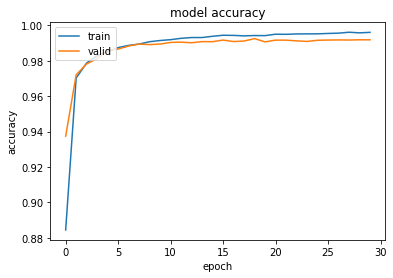

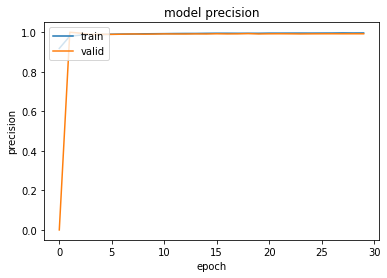

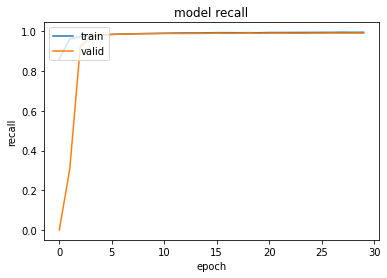

In [38]:
print(history_img1.history.keys())
plt.plot(history_img1.history['categorical_accuracy'])
plt.plot(history_img1.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()



plt.plot(history_img1.history['precision'])
plt.plot(history_img1.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()



plt.plot(history_img1.history['recall'])
plt.plot(history_img1.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [49]:
print("best model: ")
model_img1.load_weights('Saved Model/Experiments/CNN_img1.hdf5')
print(model_img1.evaluate(X_val_1_scaled, Y_val_1))
print(model_img1.evaluate(X_test_1_scaled, Y_test_1))

best model: 
  40/1614 [..............................] - ETA: 6s - loss: 0.0262 - categorical_accuracy: 0.9906 - precision: 0.9906 - recall: 0.9898 - f1_score: 0.9914

/home/tf/.conda/envs/tf2/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  'consistency.' % (self.__class__.__name__,))


1614/1614 [==============================] - 7s 5ms/step - loss: 0.0237 - categorical_accuracy: 0.9925 - precision: 0.9930 - recall: 0.9919 - f1_score: 0.9925
[0.023703033104538918, 0.9925227165222168, 0.9930188059806824, 0.9919415712356567, 0.9924643039703369]
1614/1614 [==============================] - 7s 4ms/step - loss: 0.0246 - categorical_accuracy: 0.9917 - precision: 0.9924 - recall: 0.9912 - f1_score: 0.9916
[0.024618441238999367, 0.9916703701019287, 0.9923779368400574, 0.9911860823631287, 0.9916131496429443]


# IMAGE 2

In [50]:
print('X_train_2 shape : ',X_train_2.shape)
print('X_test_2 shape : ',X_test_2.shape)
print('X_val_2 shape : ',X_val_2.shape)
print('y_train_2 shape : ',y_train_2.shape)
print('y_test_2 shape : ',y_test_2.shape)
print('y_val_2 shape : ',y_val_2.shape)

print('Y_train_2 shape : ',Y_train_2.shape)
print('Y_test_2 shape : ',Y_test_2.shape)
print('Y_val_2 shape : ',Y_val_2.shape)

X_train_2 shape :  (154867, 32, 32)
X_test_2 shape :  (51623, 32, 32)
X_val_2 shape :  (51623, 32, 32)
y_train_2 shape :  (154867,)
y_test_2 shape :  (51623,)
y_val_2 shape :  (51623,)
Y_train_2 shape :  (154867, 12)
Y_test_2 shape :  (51623, 12)
Y_val_2 shape :  (51623, 12)


In [51]:
def img2_CNN(shape_1, shape_2):
    set_seed()
    
    input = Input(shape=  (shape_1, shape_2, 1) )
    conv = Conv2D(filters = 18 ,
                  kernel_size = (3,3) ,
                  activation = tf.nn.relu )(input)
    conv = BatchNormalization()(conv)
    conv = MaxPooling2D(pool_size=(2, 2))(conv)
    conv = Flatten()(conv)
    fc = Dense(units = 100,
               activation = tf.nn.relu)(conv)
    dropout = Dropout(rate = 0.2)(fc)
    softmax = Dense(units = 12 ,
                    activation = tf.nn.softmax)(dropout)
    model = Model(inputs = input, outputs = softmax) 
    
    model.compile(
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001 , name = 'Adam'),
              loss = 'categorical_crossentropy' ,
              metrics =[
                       keras.metrics.CategoricalAccuracy(name='categorical_accuracy') ,
                       keras.metrics.Precision(name='precision'),
                       keras.metrics.Recall(name='recall'),
                       tfa.metrics.F1Score( num_classes=12,   name = 'f1_score', average='weighted'),
                          
              ])
    return  model

model_img2 = img2_CNN(32,32)
model_img2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 18)        180       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 18)        72        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 18)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4050)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               405100    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0   

In [52]:


f1_callback2 = ModelCheckpoint("Saved Model/Experiments/CNN_img2.hdf5", 
                              monitor='val_f1_score', 
                              verbose=1, 
                              save_best_only=True,
                              mode='max')

history_img2 =model_img2.fit(
                                X_train_2_scaled,Y_train_2,
                                epochs=30,
                                batch_size=  2**10,
                                validation_data=(X_val_2_scaled,Y_val_2),
                                callbacks = [f1_callback2]
                )


Epoch 1/30
152/152 [==============================] - 75s 491ms/step - loss: 0.2955 - categorical_accuracy: 0.9167 - precision: 0.9485 - recall: 0.8958 - f1_score: 0.9062 - val_loss: 1.4350 - val_categorical_accuracy: 0.9187 - val_precision: 1.0000 - val_recall: 0.0062 - val_f1_score: 0.9090

Epoch 00001: val_f1_score improved from -inf to 0.90904, saving model to Saved Model/Experiments/CNN_img2.hdf5
Epoch 2/30
152/152 [==============================] - 75s 491ms/step - loss: 0.0905 - categorical_accuracy: 0.9740 - precision: 0.9841 - recall: 0.9657 - f1_score: 0.9703 - val_loss: 0.6976 - val_categorical_accuracy: 0.9488 - val_precision: 1.0000 - val_recall: 0.5796 - val_f1_score: 0.9450

Epoch 00002: val_f1_score improved from 0.90904 to 0.94498, saving model to Saved Model/Experiments/CNN_img2.hdf5
Epoch 3/30
152/152 [==============================] - 75s 492ms/step - loss: 0.0642 - categorical_accuracy: 0.9804 - precision: 0.9867 - recall: 0.9749 - f1_score: 0.9788 - val_loss: 0.16

dict_keys(['loss', 'categorical_accuracy', 'precision', 'recall', 'f1_score', 'val_loss', 'val_categorical_accuracy', 'val_precision', 'val_recall', 'val_f1_score'])


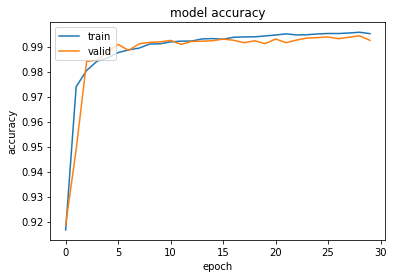

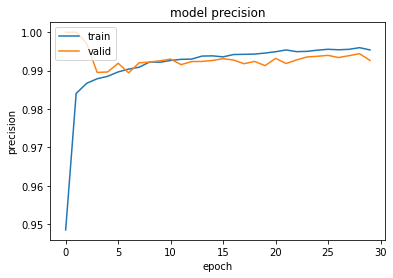

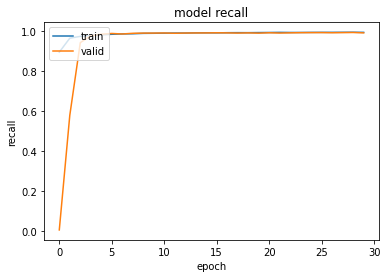

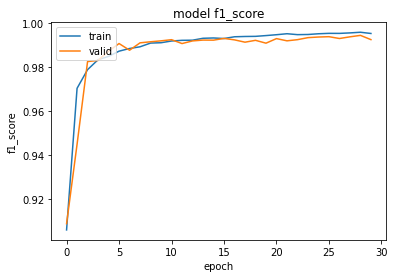

In [55]:
print(history_img2.history.keys())
plt.plot(history_img2.history['categorical_accuracy'])
plt.plot(history_img2.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history_img2.history['precision'])
plt.plot(history_img2.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history_img2.history['recall'])
plt.plot(history_img2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


plt.plot(history_img2.history['f1_score'])
plt.plot(history_img2.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


In [56]:
print("best model: ")
model_img2.load_weights("Saved Model/Experiments/CNN_img2.hdf5")
print(model_img2.evaluate(X_val_2_scaled, Y_val_2))
print(model_img2.evaluate(X_test_2_scaled, Y_test_2))

best model: 
1614/1614 [==============================] - 8s 5ms/step - loss: 0.0168 - categorical_accuracy: 0.9943 - precision: 0.9944 - recall: 0.9942 - f1_score: 0.9943
[0.016773764044046402, 0.9942854642868042, 0.9944199919700623, 0.9942273497581482, 0.9942758083343506]
1614/1614 [==============================] - 8s 5ms/step - loss: 0.0175 - categorical_accuracy: 0.9940 - precision: 0.9941 - recall: 0.9939 - f1_score: 0.9940
[0.017540093511343002, 0.993994951248169, 0.9940523505210876, 0.9939368367195129, 0.9940016269683838]


# IMG1 + IMG2 

In [57]:
def concatenate_IMG(shape1, shape2) :
    set_seed()
    #------------------------------------------
    input1 = Input(shape = (shape1, shape2, 1))
    conv1 = Conv2D(filters = 16 ,
                   kernel_size = (3, 3) , 
                   activation = tf.nn.relu )(input1)
    conv1 = MaxPooling2D(pool_size = (2,2))(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Flatten()(conv1)
    #------------------------------------------
    input2 = Input( shape = (shape1, shape2, 1))
    conv2 = Conv2D(filters = 16 ,
                   kernel_size = (3, 3) ,
                   activation= tf.nn.relu )(input2)
    conv2 = MaxPooling2D(2, 2)(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Flatten()(conv2)
    #------------------------------------------
    concat = Concatenate(axis=1)([conv1, conv2])
    concat = Dense(units = 400 ,
                   activation = tf.nn.relu)(concat)
    concat = Dense(units = 200 ,
                   activation = tf.nn.relu)(concat)
    dropout = Dropout(0.2)(concat)
    softmax = Dense(12, activation = tf.nn.softmax )(dropout)
    model = Model(inputs=[input1, input2], outputs=softmax)
    
    model.compile(
                 optimizer = tf.keras.optimizers.Adam(0.001),
                 loss = keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'),
                 metrics = [
                            keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
                            keras.metrics.Precision(name='precision'),
                            keras.metrics.Recall(name='recall'),
                            tfa.metrics.F1Score( num_classes=12,   
                                                name = 'f1_score',
                                                average='weighted')]  )

    return model
    

In [58]:
shape1 ,shape2 = 32, 32
model_img12 = concatenate_IMG(shape1, shape2)

In [59]:
model_img12.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 30, 30, 16)   160         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 30, 30, 16)   160         input_4[0][0]                    
____________________________________________________________________________________________

In [60]:

f1_callback_img12 = ModelCheckpoint("Saved Model/Experiments/model_img12.hdf5", 
                              monitor='val_f1_score', 
                              verbose=1, 
                              save_best_only=True,
                              mode='max')
history_img12 = model_img12.fit(x = [X_train_1_scaled, X_train_2_scaled],
                      y=  Y_train_1,           
                      epochs=30, 
                      batch_size = 2**10 , 
                      validation_data = ([X_val_1_scaled, X_val_2_scaled] , Y_val_1),
                      callbacks = [f1_callback_img12]
                     )



Epoch 1/30
152/152 [==============================] - 72s 468ms/step - loss: 0.3561 - categorical_accuracy: 0.9100 - precision: 0.9372 - recall: 0.8952 - f1_score: 0.9041 - val_loss: 1.4151 - val_categorical_accuracy: 0.8768 - val_precision: 1.0000 - val_recall: 0.0271 - val_f1_score: 0.8729

Epoch 00001: val_f1_score improved from -inf to 0.87288, saving model to Saved Model/Experiments/model_img12.hdf5
Epoch 2/30
152/152 [==============================] - 70s 461ms/step - loss: 0.0571 - categorical_accuracy: 0.9830 - precision: 0.9877 - recall: 0.9780 - f1_score: 0.9818 - val_loss: 0.5422 - val_categorical_accuracy: 0.9558 - val_precision: 0.9993 - val_recall: 0.7317 - val_f1_score: 0.9564

Epoch 00002: val_f1_score improved from 0.87288 to 0.95640, saving model to Saved Model/Experiments/model_img12.hdf5
Epoch 3/30
152/152 [==============================] - 70s 460ms/step - loss: 0.0360 - categorical_accuracy: 0.9888 - precision: 0.9908 - recall: 0.9867 - f1_score: 0.9884 - val_loss

In [61]:
print("best model: ")
model_img12.load_weights("Saved Model/Experiments/model_img12.hdf5")
print(model_img12.evaluate([X_val_1_scaled, X_val_2_scaled] , Y_val_1))
print(model_img12.evaluate([X_test_1_scaled, X_test_2_scaled] , Y_test_1))



best model: 
1614/1614 [==============================] - 9s 6ms/step - loss: 0.0182 - categorical_accuracy: 0.9952 - precision: 0.9953 - recall: 0.9951 - f1_score: 0.9951
[0.01819441467523575, 0.9951571822166443, 0.995272696018219, 0.9951184391975403, 0.9951376914978027]
1614/1614 [==============================] - 9s 6ms/step - loss: 0.0202 - categorical_accuracy: 0.9947 - precision: 0.9947 - recall: 0.9946 - f1_score: 0.9947
[0.02024143934249878, 0.9946922659873962, 0.9947112202644348, 0.9946341514587402, 0.9946966767311096]


# CONCATENATE

In [63]:
def model_csv_img (num_csv_features , img_shape1, img_shape2):
    set_seed()
    
    inputs1 = Input(shape= ( num_csv_features ,1 ) )
    conv1 = Conv1D(filters=10, kernel_size=3, activation='relu')(inputs1)
    pool1 = MaxPooling1D(pool_size=2)(conv1)
    batch1 = BatchNormalization()(pool1)
    flat1 = Flatten()(batch1)
    #--------------------------
    inputs2 = Input(shape=  (img_shape1, img_shape2, 1) )
    conv2 = Conv2D(filters = 16 ,
                   kernel_size = (3, 3),
                   activation=  tf.nn.relu )(inputs2)
    pool2 = MaxPooling2D(pool_size = (2,2))(conv2)
    batch2 = BatchNormalization()(pool2)
    flat2 = Flatten()(batch2)
    #--------------------------
    inputs3 = Input(shape=  (img_shape1, img_shape2, 1) )
    conv3 = Conv2D(16 ,(3, 3), activation='relu')(inputs3)
    pool3 = MaxPooling2D(pool_size = (2,2))(conv3)
    batch3 = BatchNormalization()(pool3)
    flat3 = Flatten()(batch3)
    #--------------------------
    merged = Concatenate(axis=1)([flat1, flat2,flat3])
    dense1 = Dense(units = 600, activation='relu')(merged)
    dense2 = Dense(units = 1200, activation='relu')(dense1)
    dropout = Dropout(0.2)(dense2)
    outputs = Dense(12, activation='softmax')(dropout)
    model  = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    
    model.compile(
                 optimizer = tf.keras.optimizers.Adam(0.001), 
                 loss = keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'),
                 metrics = [
                            keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
                            keras.metrics.Precision(name='precision'),
                            keras.metrics.Recall(name='recall'),
                            tfa.metrics.F1Score( num_classes=12,   
                                                name = 'f1_score',
                                                average='weighted')                          
                           ]
    )

    return model 

In [64]:
model_concatenate = model_csv_img (X_train_csv_scaled.shape[1] , 
                                   32, 
                                   32)

In [65]:
model_concatenate.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 28, 1)]      0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 26, 10)       40          input_9[0][0]                    
____________________________________________________________________________________________

In [66]:


f1_callback_concat = ModelCheckpoint("Saved Model/Experiments/model_concatenate.hdf5", 
                              monitor='val_f1_score', 
                              verbose=1, 
                              save_best_only=True,
                              mode='max')
history_concatenate = model_concatenate.fit(x = [X_train_csv_scaled,X_train_1_scaled, X_train_2_scaled],
                      y=  Y_train_csv,           
                      epochs= 30, 
                      batch_size = 2**10 , 
                      validation_data = ([X_val_csv_scaled,X_val_1_scaled, X_val_2_scaled] , Y_val_csv),
                      callbacks = [f1_callback_concat]
                     )

 

Epoch 1/30
152/152 [==============================] - ETA: 0s - loss: 0.3479 - categorical_accuracy: 0.9222 - precision: 0.9475 - recall: 0.9070 - f1_score: 0.9177

/home/tf/.conda/envs/tf2/lib/python3.7/site-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  'consistency.' % (self.__class__.__name__,))


152/152 [==============================] - 85s 556ms/step - loss: 0.3479 - categorical_accuracy: 0.9222 - precision: 0.9475 - recall: 0.9070 - f1_score: 0.9177 - val_loss: 0.8860 - val_categorical_accuracy: 0.9437 - val_precision: 0.9989 - val_recall: 0.4458 - val_f1_score: 0.9433

Epoch 00001: val_f1_score improved from -inf to 0.94333, saving model to Saved Model/Experiments/model_concatenate.hdf5
Epoch 2/30
152/152 [==============================] - 84s 551ms/step - loss: 0.0382 - categorical_accuracy: 0.9876 - precision: 0.9906 - recall: 0.9845 - f1_score: 0.9872 - val_loss: 0.1895 - val_categorical_accuracy: 0.9694 - val_precision: 0.9896 - val_recall: 0.9375 - val_f1_score: 0.9679

Epoch 00002: val_f1_score improved from 0.94333 to 0.96791, saving model to Saved Model/Experiments/model_concatenate.hdf5
Epoch 3/30
152/152 [==============================] - 84s 552ms/step - loss: 0.0219 - categorical_accuracy: 0.9926 - precision: 0.9935 - recall: 0.9917 - f1_score: 0.9925 - val_los

dict_keys(['loss', 'categorical_accuracy', 'precision', 'recall', 'f1_score', 'val_loss', 'val_categorical_accuracy', 'val_precision', 'val_recall', 'val_f1_score'])


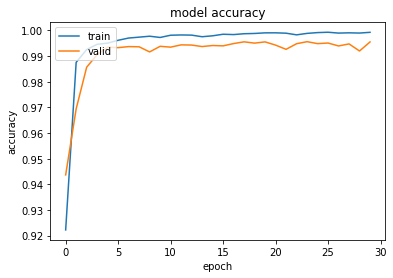

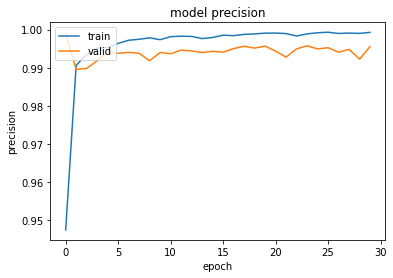

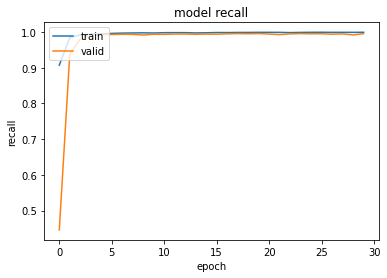

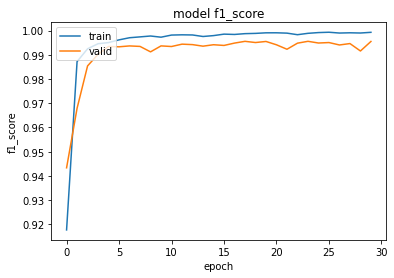

In [67]:
print(history_concatenate.history.keys())
plt.plot(history_concatenate.history['categorical_accuracy'])
plt.plot(history_concatenate.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history_concatenate.history['precision'])
plt.plot(history_concatenate.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history_concatenate.history['recall'])
plt.plot(history_concatenate.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


plt.plot(history_concatenate.history['f1_score'])
plt.plot(history_concatenate.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


In [68]:
print("best model: ")
model_concatenate.load_weights("Saved Model/Experiments/model_concatenate.hdf5")
print(model_concatenate.evaluate([X_val_csv_scaled, X_val_1_scaled, X_val_2_scaled] , Y_val_1))
print(model_concatenate.evaluate([X_test_csv_scaled, X_test_1_scaled, X_test_2_scaled] , Y_test_1))


best model: 
1614/1614 [==============================] - 12s 7ms/step - loss: 0.0186 - categorical_accuracy: 0.9956 - precision: 0.9958 - recall: 0.9955 - f1_score: 0.9956
[0.018562886863946915, 0.9956220984458923, 0.9957565665245056, 0.9954864978790283, 0.9955587387084961]
1614/1614 [==============================] - 12s 7ms/step - loss: 0.0178 - categorical_accuracy: 0.9956 - precision: 0.9957 - recall: 0.9956 - f1_score: 0.9955
[0.017761187627911568, 0.9956027269363403, 0.9956991672515869, 0.9956027269363403, 0.9955457448959351]


# Comparing with UP's model 

## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
def csv_RandomForest():
    model = RandomForestClassifier(n_estimators = 10,
                                   min_samples_split = 2,
                                   min_samples_leaf = 1,
                                   bootstrap = True,
                                   random_state = 0 
                                    )
    return model


In [64]:
model_RF = csv_RandomForest()
model_RF.fit(X_train_csv_scaled, y_train_csv)
y_pred_RandomForest = model_RF.predict(X_test_csv_scaled)
display_result(y_test_csv,y_pred_RandomForest)

Accuracy score :  0.9746430854464095
Precision score :  0.97299353092025
Recall score :  0.9746430854464095
F1 score :  0.9728036654461721


In [66]:
filename = 'Saved Model/Paper/RandomForest_model.sav'
joblib.dump(model_RF, filename)
loaded_RF_model = joblib.load(filename)

y_pred_csv_RandomForest = loaded_RF_model.predict(X_test_csv_scaled)
display_result(y_test_csv, y_pred_csv_RandomForest) 

Accuracy score :  0.9746430854464095
Precision score :  0.97299353092025
Recall score :  0.9746430854464095
F1 score :  0.9728036654461721


## SVM 

In [68]:
from sklearn import svm
def csv_SVM():
    model = svm.SVC(C = 1,
                kernel = 'rbf',
                gamma  = 'auto',
                shrinking  = True,
                tol = 0.001,
                random_state = 0
                )
    return model




In [69]:
model_SVM = csv_SVM()
model_SVM.fit(X_train_csv_scaled, y_train_csv)
y_pred_SVM = model_SVM.predict(X_test_csv_scaled)
display_result(y_test_csv,y_pred_SVM)

Accuracy score :  0.9696840555566317
Precision score :  0.9682218625909775
Recall score :  0.9696840555566317
F1 score :  0.9661331258667356


In [70]:
filename = 'Saved Model/Paper/SVM_model.sav'
joblib.dump(model_SVM, filename)
loaded_SVM_model = joblib.load(filename)

y_pred_csv_SVM = loaded_SVM_model.predict(X_test_csv_scaled)
display_result(y_test_csv, y_pred_csv_SVM) 

Accuracy score :  0.9696840555566317
Precision score :  0.9682218625909775
Recall score :  0.9696840555566317
F1 score :  0.9661331258667356


## kNN 

In [71]:
from sklearn.neighbors import KNeighborsClassifier
def csv_kNN():
    model = KNeighborsClassifier(n_neighbors=5,
                                 leaf_size = 30, 
                                 metric = 'euclidean')
    return model 



In [72]:
model_kNN = csv_kNN()
model_kNN.fit(X_train_csv_scaled, y_train_csv)
y_pred_kNN = model_kNN.predict(X_test_csv_scaled)
display_result(y_test_csv,y_pred_kNN)

Accuracy score :  0.9724735098696318
Precision score :  0.9707220537176988
Recall score :  0.9724735098696318
F1 score :  0.9705624147721252


In [73]:
filename = 'Saved Model/Paper/KNN_model.sav'
joblib.dump(model_kNN, filename)
loaded_KNN_model = joblib.load(filename)

y_pred_csv_KNN = loaded_KNN_model.predict(X_test_csv_scaled)
display_result(y_test_csv, y_pred_csv_KNN) 

Accuracy score :  0.9724735098696318
Precision score :  0.9707220537176988
Recall score :  0.9724735098696318
F1 score :  0.9705624147721252


## MLP

In [74]:
from sklearn.neural_network import MLPClassifier

def csv_MLP():
    model = MLPClassifier(hidden_layer_sizes=(100,), 
                          activation='relu',
                          solver='sgd', 
                          alpha=0.0001, 
                          batch_size='auto', 
                          learning_rate_init=0.001, 
                          shuffle=True, 
                          random_state=0,
                          tol=0.0001, 
                          verbose=True, 
                          beta_1 = 0.9,
                          beta_2 = 0.999, 
                          max_iter = 10 )
    return model 




In [75]:
model_MLP = csv_MLP()
model_MLP.fit(X_train_csv_scaled, y_train_csv)
y_pred_MLP = model_MLP.predict(X_test_csv_scaled)
display_result(y_test_csv,y_pred_MLP)


Iteration 1, loss = 1.44348865
Iteration 2, loss = 0.91531298
Iteration 3, loss = 0.73099396
Iteration 4, loss = 0.62725433
Iteration 5, loss = 0.55896672
Iteration 6, loss = 0.50918701
Iteration 7, loss = 0.47050653
Iteration 8, loss = 0.43908364
Iteration 9, loss = 0.41294291
Iteration 10, loss = 0.39081072


/home/tf/.conda/envs/tf2/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy score :  0.9021753869399298
Precision score :  0.8836096881084812
Recall score :  0.9021753869399298
F1 score :  0.8843256709741995


/home/tf/.conda/envs/tf2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
filename = 'Saved Model/Paper/MLP_model.sav'
joblib.dump(model_MLP, filename)
loaded_MLP_model = joblib.load(filename)

y_pred_csv_MLP = loaded_MLP_model.predict(X_test_csv_scaled)
display_result(y_test_csv, y_pred_csv_MLP) 

Accuracy score :  0.9021753869399298
Precision score :  0.8836096881084812
Recall score :  0.9021753869399298
F1 score :  0.8843256709741995


/home/tf/.conda/envs/tf2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
def model_paper(shape1, shape2):
    set_seed()
    model =   Sequential([
                        Conv2D(8 ,(3, 3), 
                               activation = tf.nn.relu,
                               input_shape=( shape1 , shape2 ,1)),
                        MaxPooling2D(2, 2),
                        Conv2D(16 ,(3, 3), 
                               activation = tf.nn.relu),
                        MaxPooling2D(2, 2),
                        Conv2D(32 ,(3, 3), 
                               activation = tf.nn.relu),
                        MaxPooling2D(2, 2),
                        Flatten(),
                        Dense(12, activation= tf.nn.softmax,
                                              kernel_regularizer=tf.keras.regularizers.l1(0.004),
                                              activity_regularizer=tf.keras.regularizers.l2(0.004)) ])


    model.compile(
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, name='SGD'),
              loss = 'categorical_crossentropy' ,
              metrics =[
                       keras.metrics.CategoricalAccuracy(name='categorical_accuracy') ,
                       keras.metrics.Precision(name='precision'),
                       keras.metrics.Recall(name='recall'),
                       tfa.metrics.F1Score( num_classes=12,   name = 'f1_score', average='weighted'),

              ])
    return  model

model_img_paper1 = model_paper(32,32)
model_img_paper1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 32)          4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

In [34]:
X_train_1.shape

(154867, 32, 32, 1)

In [35]:
f1_paper_callback1 = ModelCheckpoint("Saved Model/Paper/UP_1_32.hdf5", 
                              monitor='val_f1_score', 
                              verbose=1, 
                              save_best_only=True,
                              mode='max')

history_img_paper1 = model_img_paper1.fit(
                                X_train_1_scaled,Y_train_1,
                                epochs=30,
                                batch_size=  100,
                                validation_data=(X_val_1_scaled,Y_val_1),
                                callbacks = [f1_paper_callback1 ]
                )


Epoch 1/30
1549/1549 [==============================] - 39s 25ms/step - loss: 2.6792 - categorical_accuracy: 0.2635 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.1265 - val_loss: 2.3581 - val_categorical_accuracy: 0.2777 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.1207

Epoch 00001: val_f1_score improved from -inf to 0.12075, saving model to Saved Model/Paper/UP_1_32.hdf5
Epoch 2/30
1549/1549 [==============================] - 39s 25ms/step - loss: 2.3308 - categorical_accuracy: 0.2785 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.1214 - val_loss: 2.3139 - val_categorical_accuracy: 0.2777 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.1207

Epoch 00002: val_f1_score did not improve from 0.12075
Epoch 3/30
1549/1549 [==============================] - 38s 25ms/step - loss: 2.2897 - categorical_accuracy: 0.2785 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.1214 - val_loss: 2.2745 - val_categorical_ac

In [36]:
print("best model: ")
model_img_paper1.load_weights("Saved Model/Paper/UP_1_32.hdf5")
print(model_img_paper1.evaluate(X_val_1_scaled, Y_val_1))
print(model_img_paper1.evaluate(X_test_1_scaled, Y_test_1))

best model: 
1614/1614 [==============================] - 7s 4ms/step - loss: 0.8270 - categorical_accuracy: 0.7923 - precision: 0.8522 - recall: 0.7092 - f1_score: 0.7704
[0.8270156979560852, 0.7922631502151489, 0.8521648049354553, 0.7091606259346008, 0.7704067230224609]
1614/1614 [==============================] - 6s 4ms/step - loss: 0.8299 - categorical_accuracy: 0.7892 - precision: 0.8481 - recall: 0.7098 - f1_score: 0.7669
[0.8298739194869995, 0.7892025113105774, 0.8480766415596008, 0.7097998857498169, 0.7669154405593872]


dict_keys(['loss', 'categorical_accuracy', 'precision', 'recall', 'f1_score', 'val_loss', 'val_categorical_accuracy', 'val_precision', 'val_recall', 'val_f1_score'])


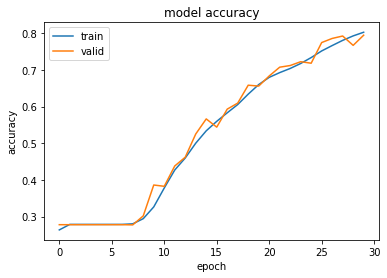

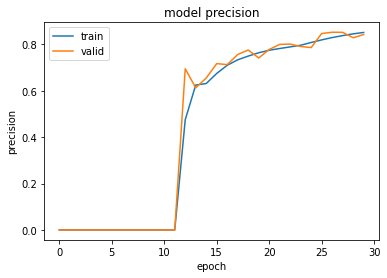

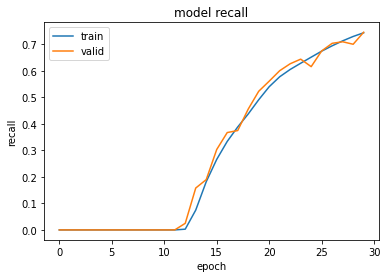

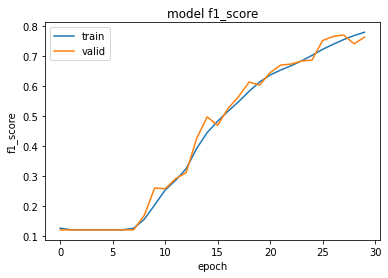

In [37]:
print(history_img_paper1.history.keys())
plt.plot(history_img_paper1.history['categorical_accuracy'])
plt.plot(history_img_paper1.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history_img_paper1.history['precision'])
plt.plot(history_img_paper1.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history_img_paper1.history['recall'])
plt.plot(history_img_paper1.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


plt.plot(history_img_paper1.history['f1_score'])
plt.plot(history_img_paper1.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [40]:
model_img_paper2 = model_paper(32,32)
model_img_paper2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 32)          4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)              

In [41]:
f1_paper_callback2 = ModelCheckpoint("Saved Model/Paper/UP_2_32.hdf5", 
                              monitor='val_f1_score', 
                              verbose=1, 
                              save_best_only=True,
                              mode='max')

history_img_paper2 = model_img_paper2.fit(
                                X_train_2_scaled,Y_train_2,
                                epochs=30,
                                batch_size=  100,
                                validation_data=(X_val_2_scaled,Y_val_2),
                                callbacks = [f1_paper_callback2 ]
                )


Epoch 1/30
1549/1549 [==============================] - 39s 25ms/step - loss: 2.6647 - categorical_accuracy: 0.2663 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.1265 - val_loss: 2.3155 - val_categorical_accuracy: 0.2777 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.1207

Epoch 00001: val_f1_score improved from -inf to 0.12075, saving model to Saved Model/Paper/UP_2_32.hdf5
Epoch 2/30
1549/1549 [==============================] - 39s 25ms/step - loss: 2.2366 - categorical_accuracy: 0.3451 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.2350 - val_loss: 2.1299 - val_categorical_accuracy: 0.5333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.4336

Epoch 00002: val_f1_score improved from 0.12075 to 0.43361, saving model to Saved Model/Paper/UP_2_32.hdf5
Epoch 3/30
1549/1549 [==============================] - 39s 25ms/step - loss: 1.8845 - categorical_accuracy: 0.6418 - precision: 0.8738 - recall: 0.1497 - f1_score: 0.

In [42]:
print("best model: ")
model_img_paper2.load_weights("Saved Model/Paper/UP_2_32.hdf5")
print(model_img_paper2.evaluate(X_val_2_scaled, Y_val_2))
print(model_img_paper2.evaluate(X_test_2_scaled, Y_test_2))

best model: 
1614/1614 [==============================] - 7s 4ms/step - loss: 0.5303 - categorical_accuracy: 0.8822 - precision: 0.9028 - recall: 0.8609 - f1_score: 0.8603
[0.530326783657074, 0.8821843266487122, 0.9027644991874695, 0.8609340786933899, 0.8602725267410278]
1614/1614 [==============================] - 7s 4ms/step - loss: 0.5296 - categorical_accuracy: 0.8825 - precision: 0.9033 - recall: 0.8613 - f1_score: 0.8607
[0.5296090841293335, 0.8824554681777954, 0.9032624959945679, 0.8613215088844299, 0.8606771230697632]


dict_keys(['loss', 'categorical_accuracy', 'precision', 'recall', 'f1_score', 'val_loss', 'val_categorical_accuracy', 'val_precision', 'val_recall', 'val_f1_score'])


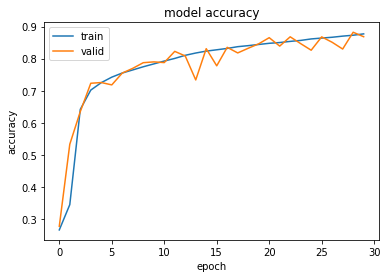

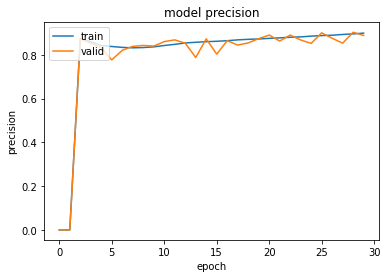

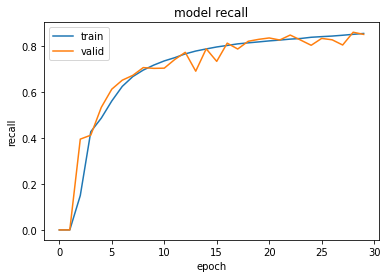

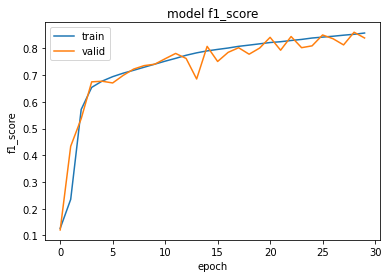

In [43]:
print(history_img_paper2.history.keys())
plt.plot(history_img_paper2.history['categorical_accuracy'])
plt.plot(history_img_paper2.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history_img_paper2.history['precision'])
plt.plot(history_img_paper2.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history_img_paper2.history['recall'])
plt.plot(history_img_paper2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


plt.plot(history_img_paper2.history['f1_score'])
plt.plot(history_img_paper2.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()